In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                  #gerekli kütüphaneler import edildi.
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
df=pd.read_csv("eeg.csv")
print(df.info())                                      #datasetin okunması.  #datasetin bilgilerinin görüntülenmesi.
                                                       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14980 non-null  float64
 1   F7      14980 non-null  float64
 2   eye     14980 non-null  object 
 3   F3      14980 non-null  float64
 4   FC5     14980 non-null  float64
 5   T7      14980 non-null  float64
 6   P7      14980 non-null  float64
 7   O1      14980 non-null  float64
 8   O2      14980 non-null  float64
 9   P8      14980 non-null  float64
 10  T8      14980 non-null  float64
 11  FC6     14980 non-null  float64
 12  F4      14980 non-null  float64
 13  F8      14980 non-null  float64
 14  AF4     14980 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.7+ MB
None


In [4]:
df.head()    #datasetin ilk 5 satırı görüntülendi.

AF3       F7   eye       F3      FC5       T7       P7       O1  \
0  4329.23  4009.23  Open  4289.23  4148.21  4350.26  4586.15  4096.92   
1  4324.62  4004.62  Open  4293.85  4148.72  4342.05  4586.67  4097.44   
2  4327.69  4006.67  Open  4295.38  4156.41  4336.92  4583.59  4096.92   
3  4328.72  4011.79  Open  4296.41  4155.90  4343.59  4582.56  4097.44   
4  4326.15  4011.79  Open  4292.31  4151.28  4347.69  4586.67  4095.90   

        O2       P8       T8      FC6       F4       F8      AF4  
0  4641.03  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85  
1  4638.97  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10  
2  4630.26  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23  
3  4630.77  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41  
4  4627.69  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46

In [5]:
df.isnull().sum()                        #boş verilerin sayısı görüntülendi.

AF3    0
F7     0
eye    0
F3     0
FC5    0
T7     0
P7     0
O1     0
O2     0
P8     0
T8     0
FC6    0
F4     0
F8     0
AF4    0
dtype: int64

In [6]:
print(df["eye"].value_counts())         #"eye" sutunu bilgieri görüntülendi.

Open      8257
Closed    6723
Name: eye, dtype: int64


In [7]:
df.eye=[1 if each =="Open" else 0 for each in df.eye]           #open değerleri 1 closed değerleir 0 yapıldı.

In [8]:
y = df["eye"].values
X = df.drop(['eye'], axis=1).values                  #x ve y değerlerine atama işlemi yapıldı.

In [9]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()                                     #standart scaler makeineye eğitildi.
X=Scaler.fit_transform(X)

X[0:3]

array([[ 0.00293429, -0.01170422,  0.56739848, -0.00320851,  0.24523598,
        -0.01978751, -0.00292998,  0.85256778,  0.00150884,  0.18774952,
         0.23350974,  0.03074472,  0.01712667, -0.0038339 ],
       [ 0.00108436, -0.1120522 ,  0.6713903 , -0.00311074,  0.00889307,
        -0.01960972, -0.00281695,  0.78224051, -0.00377123, -0.12210892,
         0.13849779,  0.0061918 ,  0.0145777 , -0.00548894],
       [ 0.00231631, -0.06742891,  0.70582915, -0.00163649, -0.13878526,
        -0.02066282, -0.00292998,  0.4848859 , -0.00521295, -0.24352928,
         0.11150275,  0.06781481,  0.01118458, -0.00461813]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [11]:
 def keras_model(optimizer="adam"):
    model = Sequential()
    model.add(Dense(32, input_dim=14, activation='relu'))
    model.add(Dropout(0.1))# overfittingin önüne geçmek için droupout eklendi        #Keras ağı oluşturuldu.
    model.add(Dense(20, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='sigmoid'))         
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model
model = keras_model() 

In [12]:
egitim=model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1,validation_data=(X_test,y_test))

Epoch 1/100
210/210 [==============================] - 2s 8ms/step - loss: 0.6817 - accuracy: 0.5565 - val_loss: 0.6767 - val_accuracy: 0.5387
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6634 - accuracy: 0.5762 - val_loss: 0.6588 - val_accuracy: 0.5952
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6431 - accuracy: 0.6294 - val_loss: 0.6423 - val_accuracy: 0.6150
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6291 - accuracy: 0.6495 - val_loss: 0.6212 - val_accuracy: 0.6624
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6130 - accuracy: 0.6684 - val_loss: 0.6061 - val_accuracy: 0.6749
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6030 - accuracy: 0.6709 - val_loss: 0.5943 - val_accuracy: 0.6854
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.5905 - accuracy: 0.6842 - val_loss: 0.5833 - val_accuracy: 0.6927

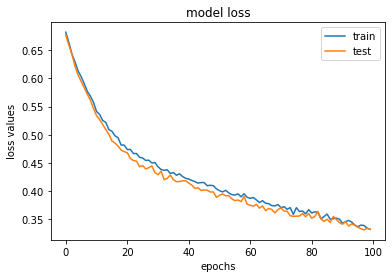

In [13]:
import matplotlib.pyplot as plt
plt.plot(egitim.history['loss'], label='train')
plt.plot(egitim.history['val_loss'], label='test')
plt.title('model loss')                                                    #grafik çizdirildi.
plt.xlabel('epochs')
plt.ylabel('loss values')                             
plt.legend(loc='upper right')
plt.show()

In [14]:
import sklearn.metrics as metrics
y_pred=model.predict_classes(X_test)                      #metrics import edildi.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [15]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))      #accuracy hesaplandı.

Accuracy: 0.855807743658211


In [16]:
print("f1:",metrics.f1_score(y_test, y_pred))               #f1 hesaplandı.

f1: 0.8668310727496916


In [17]:
keras_param = {
   
    'epochs': [100,150],                  #grid search değerleri girildi.
    
    'batch_size':[32,50],

    'optimizer':['ADAM', 'SGD'],
    
}

In [18]:
keras_cl = KerasClassifier(build_fn=keras_model, verbose=1)


keras_cv = GridSearchCV(estimator=keras_cl,             #keras için grid search verileri belirlendi.
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=keras_param)

In [19]:
keras_cv_model = keras_cv.fit(X_train, y_train,) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 34.5min finished


Epoch 1/150
210/210 [==============================] - 1s 3ms/step - loss: 0.6728 - accuracy: 0.5626
Epoch 2/150
210/210 [==============================] - 1s 3ms/step - loss: 0.6499 - accuracy: 0.6115
Epoch 3/150
210/210 [==============================] - 1s 3ms/step - loss: 0.6354 - accuracy: 0.6308
Epoch 4/150
210/210 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6632
Epoch 5/150
210/210 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.6880
Epoch 6/150
210/210 [==============================] - 1s 3ms/step - loss: 0.5719 - accuracy: 0.6990: 0s - loss: 0.5746 
Epoch 7/150
210/210 [==============================] - 1s 3ms/step - loss: 0.5575 - accuracy: 0.7102
Epoch 8/150
210/210 [==============================] - 1s 4ms/step - loss: 0.5456 - accuracy: 0.7192
Epoch 9/150
210/210 [==============================] - 1s 3ms/step - loss: 0.5343 - accuracy: 0.7193
Epoch 10/150
210/210 [==============================] - 1s 3ms/step - l

In [20]:
print(keras_cv_model.best_params_)

{'batch_size': 50, 'epochs': 150, 'optimizer': 'ADAM'}


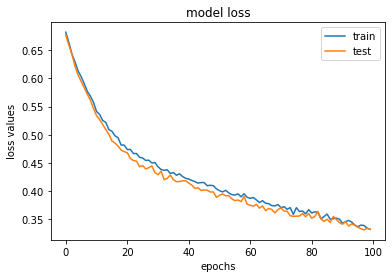

In [21]:
import matplotlib.pyplot as plt
plt.plot(egitim.history['loss'], label='train')
plt.plot(egitim.history['val_loss'], label='test')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

In [23]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(keras_cv_model, X_test, y_test, cv=kfold,scoring= 'accuracy')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.8min finished


Epoch 1/150
113/113 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5374
Epoch 2/150
113/113 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5380
Epoch 3/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5811
Epoch 4/150
113/113 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.5889
Epoch 5/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6017
Epoch 6/150
113/113 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6261
Epoch 7/150
113/113 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6381
Epoch 8/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.6406
Epoch 9/150
113/113 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.6598
Epoch 10/150
113/113 [==============================] - 0s 3ms/step - loss: 0.6150 - accura

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 15.7min finished


Epoch 1/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5357
Epoch 2/150
72/72 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5433
Epoch 3/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5357
Epoch 4/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5713
Epoch 5/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5739
Epoch 6/150
72/72 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.5947
Epoch 7/150
72/72 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.6067
Epoch 8/150
72/72 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6095
Epoch 9/150
72/72 [==============================] - 0s 6ms/step - loss: 0.6452 - accuracy: 0.6220
Epoch 10/150
72/72 [==============================] - 0s 6ms/step - loss: 0.6363 - accuracy: 0.6323
Epoch 11/

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.3min finished


Epoch 1/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5071
Epoch 2/150
113/113 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5669
Epoch 3/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5905
Epoch 4/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6014
Epoch 5/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6197
Epoch 6/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6303
Epoch 7/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.6515
Epoch 8/150
113/113 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6709
Epoch 9/150
113/113 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.6812: 0s - loss: 0.6029 - accuracy
Epoch 10/150
113/113 [==============================] - 0s 3m

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.8min finished


Epoch 1/150
72/72 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.5085
Epoch 2/150
72/72 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5716
Epoch 3/150
72/72 [==============================] - 1s 8ms/step - loss: 0.6703 - accuracy: 0.5864
Epoch 4/150
72/72 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.6014
Epoch 5/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6128
Epoch 6/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.6248
Epoch 7/150
72/72 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.6359
Epoch 8/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6272 - accuracy: 0.6445
Epoch 9/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.6509
Epoch 10/150
72/72 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.6615
Epoch 11/

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.6min finished


Epoch 1/150
113/113 [==============================] - 1s 4ms/step - loss: 0.6895 - accuracy: 0.5348
Epoch 2/150
113/113 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5654
Epoch 3/150
113/113 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.5984
Epoch 4/150
113/113 [==============================] - 1s 6ms/step - loss: 0.6521 - accuracy: 0.6096
Epoch 5/150
113/113 [==============================] - 0s 4ms/step - loss: 0.6405 - accuracy: 0.6268
Epoch 6/150
113/113 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6365
Epoch 7/150
113/113 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6438
Epoch 8/150
113/113 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6452
Epoch 9/150
113/113 [==============================] - 1s 5ms/step - loss: 0.6028 - accuracy: 0.6552: 0s - loss: 0.6048 - accura
Epoch 10/150
113/113 [==============================] - 0s 4ms/

In [24]:
print('K-fold Cross Validation Accuracy Sonuçları: ', results)       #Kfold sonuçları ve ortalaması hesaplandı.
print('K-fold Cross Validation Accuracy Sonuçlarının Ortalaması: ', results.mean())

K-fold Cross Validation Accuracy Sonuçları:  [0.79977753 0.80088988 0.81423804 0.79644049 0.80957684]
K-fold Cross Validation Accuracy Sonuçlarının Ortalaması:  0.8041845554699479


In [25]:
y_pred= keras_cv_model.predict(X_test)

90/90 [==============================] - 0s 3ms/step


In [26]:
import sklearn.metrics as metrics                      #f1 skor hesaplandı.
print("f1:",metrics.f1_score(y_test, y_pred))

f1: 0.896341463414634


In [27]:
print("acc:",metrics.accuracy_score(y_test, y_pred))                    #acc hesaplandı.
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

acc: 0.8865153538050734


In [28]:
model_conf = confusion_matrix(y_test, y_pred)                #cm bastırıldı.
print(model_conf)

[[1779  294]
 [ 216 2205]]


In [30]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)


plt.title("ROC")
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])                                            #ROC AUC İLE VERİLER ÇİZDİRİLDİ.
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()